<a href="https://colab.research.google.com/github/RafaelaRabelo/Aplicacao_de_Matematica_Avancada_MAPLE/blob/main/TestePetrobras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pandas openpyxl


In [3]:
import pandas as pd
from google.colab import files

# Fazer o upload do arquivo Excel
uploaded = files.upload()

# Assumindo que o arquivo é carregado com o nome 'Tabela-de-pocos - Analista de BI.xlsx'
file_path = list(uploaded.keys())[0]

# Ler a planilha
df = pd.read_excel(file_path)

# Substituir valores vazios por "Não informado" em todas as colunas
df.fillna("Não informado", inplace=True)

# Salvar a planilha modificada
output_path = 'Tabela-de-pocos - Analista de BI - Modificado.xlsx'
df.to_excel(output_path, index=False)

print(f"Planilha modificada salva em: {output_path}")

# Fazer o download do arquivo modificado
files.download(output_path)


Saving Tabela-de-pocos - Analista de BI.xlsx to Tabela-de-pocos - Analista de BI (1).xlsx
Planilha modificada salva em: Tabela-de-pocos - Analista de BI - Modificado.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Informar a quantidade de linhas e colunas antes da modificação
num_rows, num_cols = df.shape
print(f"Quantidade de linhas: {num_rows}")
print(f"Quantidade de colunas: {num_cols}")


Quantidade de linhas: 30044
Quantidade de colunas: 10


TOTAL DE POÇOS

In [6]:
#Ver quantidade de linhas referente aos poços
num_rows = df.shape[0]
print(f"Total de poços: {num_rows}")

# Filtrar a coluna "SITUACAO" e ver quantos poços estão "PRODUZINDO"
produzindo_count = df[df['SITUACAO'] == 'PRODUZINDO'].shape[0]
print(f"Poços em produção': {produzindo_count}")

# Filtrar a coluna "SITUACAO" e ver quantos poços estão "INJETANDO"
injetando_count = df[df['SITUACAO'] == 'INJETANDO'].shape[0]
print(f"Poços injetando': {injetando_count}")

# Filtrar a coluna "SITUACAO" e ver quantos poços estão "PRODUZINDO E INJETANDO"
produzindoeinjetando_count = df[df['SITUACAO'] == 'PRODUZINDO E INJETANDO'].shape[0]
print(f"Poços em produção e injetando': {produzindoeinjetando_count}")

# Total de Bacias
num_bacias = df['BACIA'].nunique()
print(f"Total de bacias: {num_bacias}")

# Total de Campos
num_campos = df['CAMPO'].nunique()
print(f"Total de campos: {num_campos}")

Total de poços: 30044
Poços em produção': 7260
Poços injetando': 2106
Poços em produção e injetando': 15
Total de bacias: 37
Total de campos: 558


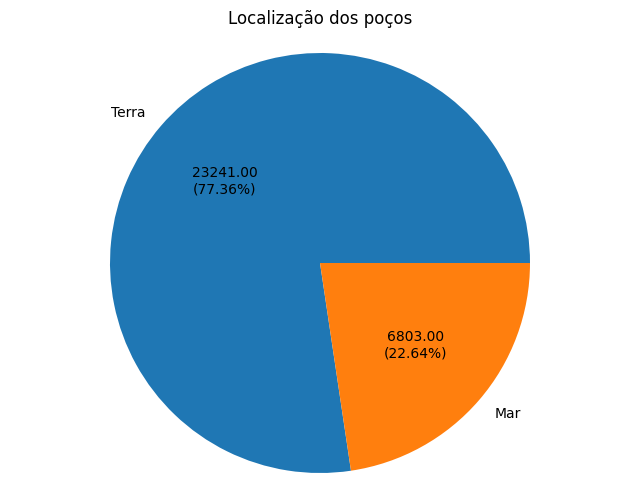

In [8]:
import matplotlib.pyplot as plt

# Substituir os valores "T" por "Terra" e "M" por "Mar" na coluna "TERRA_MAR"
df['TERRA_MAR'] = df['TERRA_MAR'].replace({'T': 'Terra', 'M': 'Mar'})

# Contar o número de ocorrências de cada categoria
count = df['TERRA_MAR'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(count, labels=count.index, autopct=lambda p: '{:.2f}\n({:.2f}%)'.format(p * sum(count) / 100, p))
plt.title('Localização dos poços')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

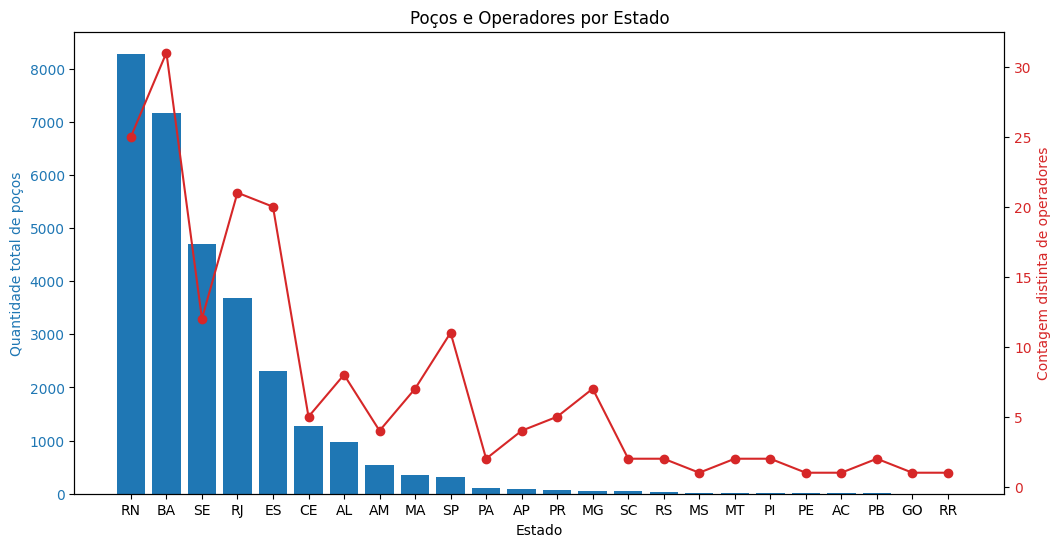

In [9]:
# Calcular a quantidade total de poços por estado
pocos_por_estado = df.groupby('ESTADO')['POCO'].count()

# Calcular a contagem distinta de operadores por estado
operadores_por_estado = df.groupby('ESTADO')['OPERADOR'].nunique()

# Ordenar os estados com base na quantidade de poços
estados_ordenados = pocos_por_estado.sort_values(ascending=False).index

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Criar gráfico de barras para a quantidade total de poços por estado
color = 'tab:blue'
ax1.bar(range(len(pocos_por_estado)), pocos_por_estado[estados_ordenados], color=color)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Quantidade total de poços', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Criar eixo Y secundário para a contagem distinta de operadores por estado (gráfico de linha)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(len(operadores_por_estado)), operadores_por_estado[estados_ordenados], color=color, marker='o')
ax2.set_ylabel('Contagem distinta de operadores', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Definir rótulos do eixo X com os estados
plt.xticks(range(len(pocos_por_estado)), estados_ordenados, rotation=45)

# Adicionar título
plt.title('Poços e Operadores por Estado')

# Mostrar o gráfico
plt.show()


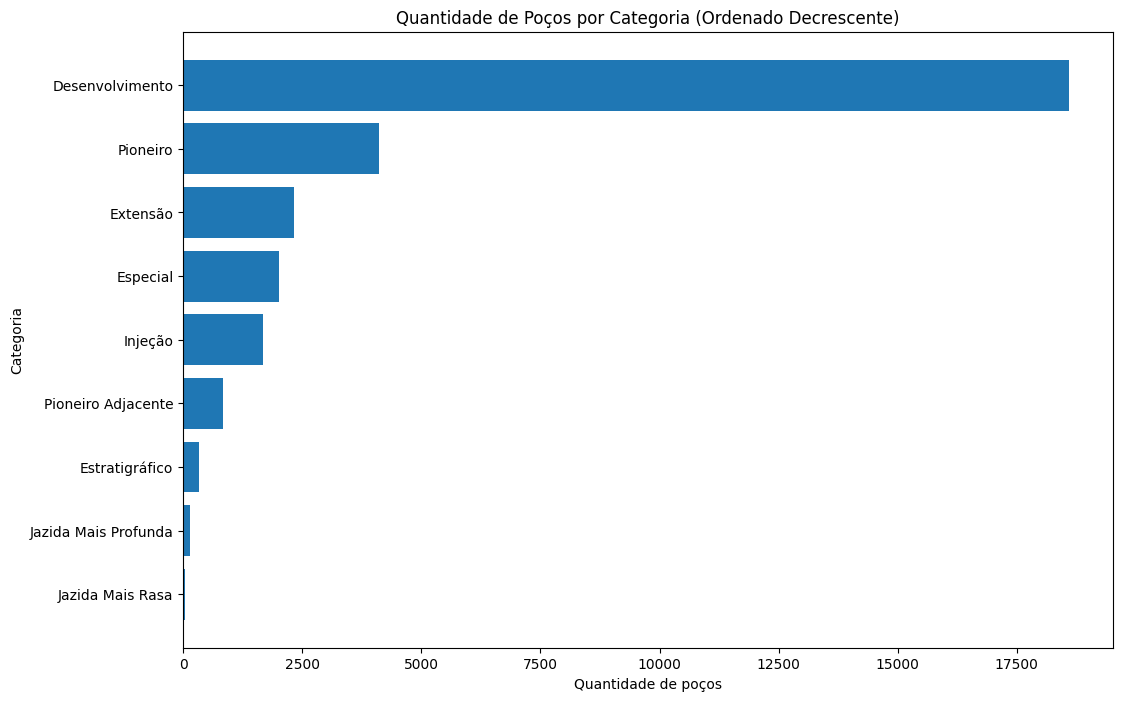

In [10]:
# Calcular a quantidade de poços por categoria e ordenar os valores de forma decrescente
categoria_por_poco_sorted = df.groupby('CATEGORIA')['POCO'].count().sort_values(ascending=True)

# Criar figura e eixos
plt.figure(figsize=(12, 8))

# Criar gráfico de barras verticais
plt.barh(categoria_por_poco_sorted.index, categoria_por_poco_sorted)

# Definir rótulos e título
plt.xlabel('Quantidade de poços')
plt.ylabel('Categoria')
plt.title('Quantidade de Poços por Categoria (Ordenado Decrescente)')

# Mostrar o gráfico
plt.show()


Análise temporal


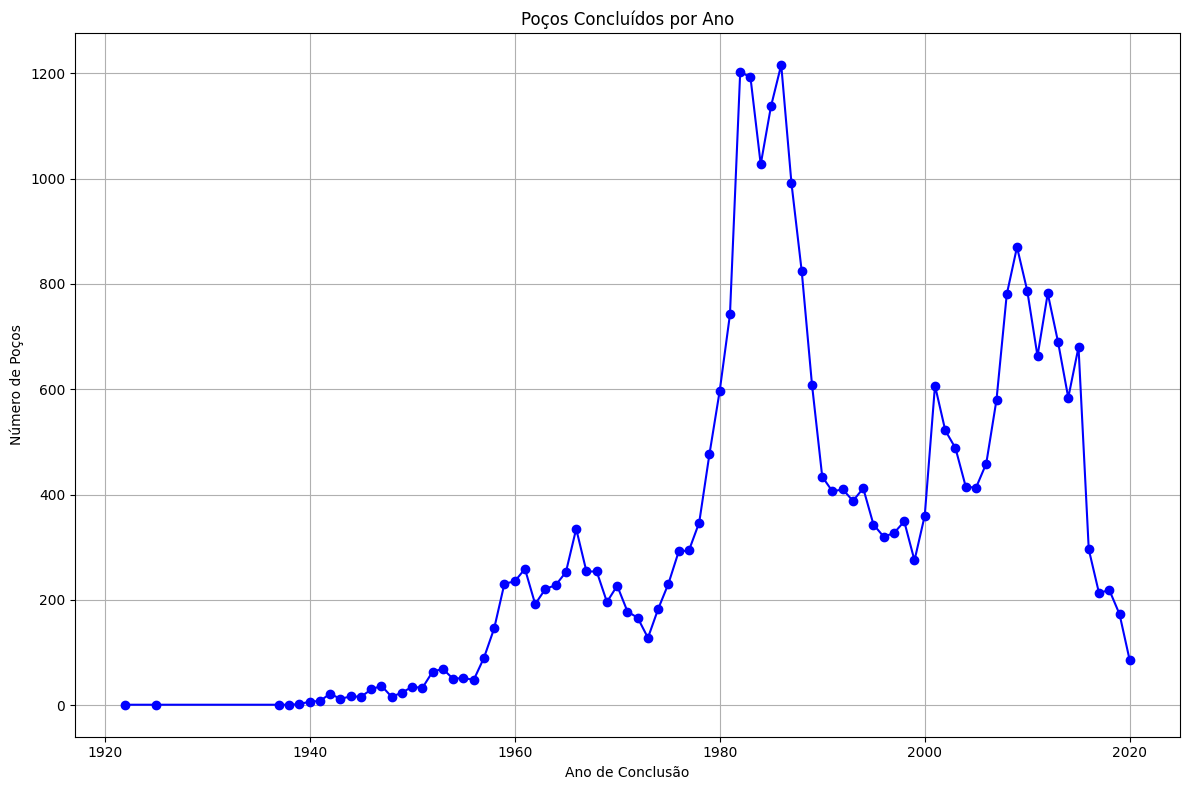

In [17]:
# Converter a coluna "CONCLUSAO" para o tipo de dados de data
df['CONCLUSAO'] = pd.to_datetime(df['CONCLUSAO'], errors='coerce')

# Extrair o ano da coluna "CONCLUSAO"
df['ANO_CONCLUSAO'] = df['CONCLUSAO'].dt.year

# Contar o número de poços concluídos em cada ano
poços_por_ano = df.groupby('ANO_CONCLUSAO')['POCO'].count()

# Criar figura e eixos
plt.figure(figsize=(12, 8))

# Criar gráfico de linha para poços concluídos por ano
plt.plot(poços_por_ano.index, poços_por_ano, marker='o', color='b')

# Definir rótulos e título
plt.xlabel('Ano de Conclusão')
plt.ylabel('Número de Poços')
plt.title('Poços Concluídos por Ano')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-18-5ee79bcc33a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apos_2000['ANO_CONCLUSAO'] = df_apos_2000['CONCLUSAO'].dt.year


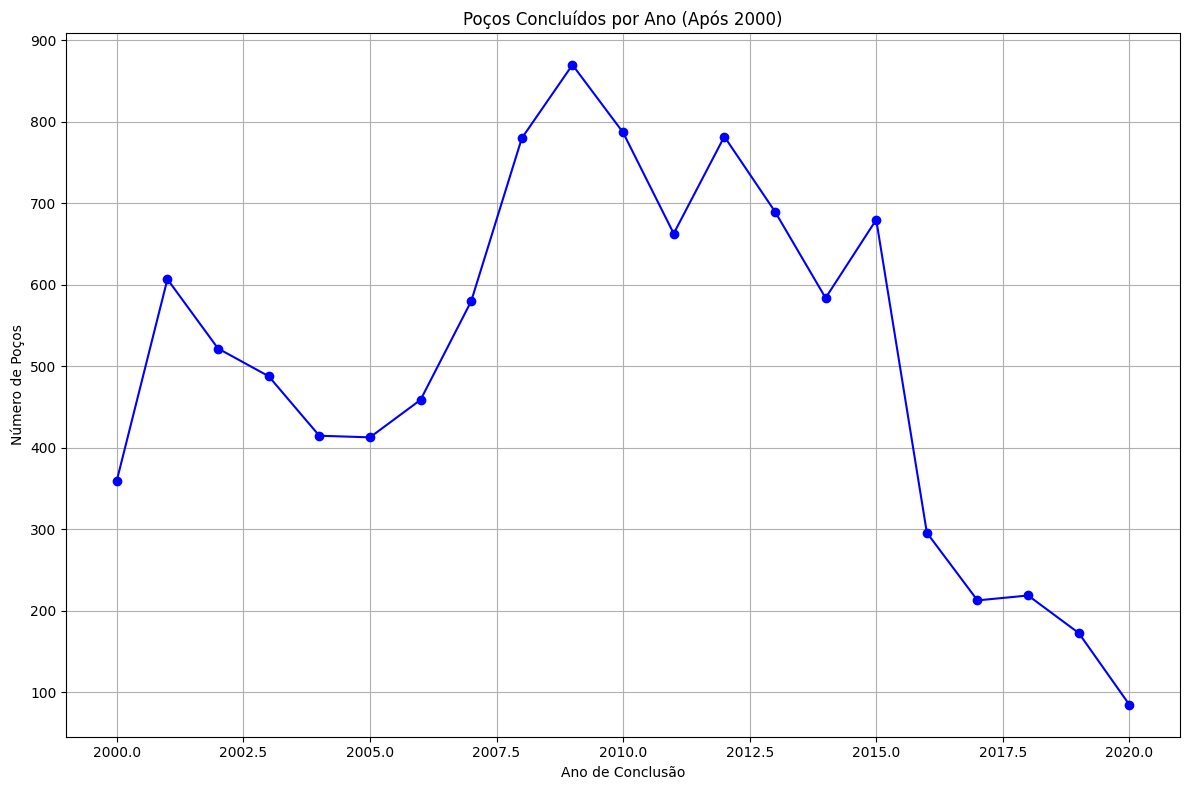

In [18]:
# Converter a coluna "CONCLUSAO" para o tipo de dados de data
df['CONCLUSAO'] = pd.to_datetime(df['CONCLUSAO'], errors='coerce')

# Filtrar os dados para incluir apenas os poços concluídos a partir do ano 2000
df_apos_2000 = df[df['CONCLUSAO'].dt.year >= 2000]

# Extrair o ano da coluna "CONCLUSAO"
df_apos_2000['ANO_CONCLUSAO'] = df_apos_2000['CONCLUSAO'].dt.year

# Contar o número de poços concluídos em cada ano após 2000
poços_por_ano_apos_2000 = df_apos_2000.groupby('ANO_CONCLUSAO')['POCO'].count()

# Criar figura e eixos
plt.figure(figsize=(12, 8))

# Criar gráfico de linha para poços concluídos por ano após 2000
plt.plot(poços_por_ano_apos_2000.index, poços_por_ano_apos_2000, marker='o', color='b')

# Definir rótulos e título
plt.xlabel('Ano de Conclusão')
plt.ylabel('Número de Poços')
plt.title('Poços Concluídos por Ano (Após 2000)')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


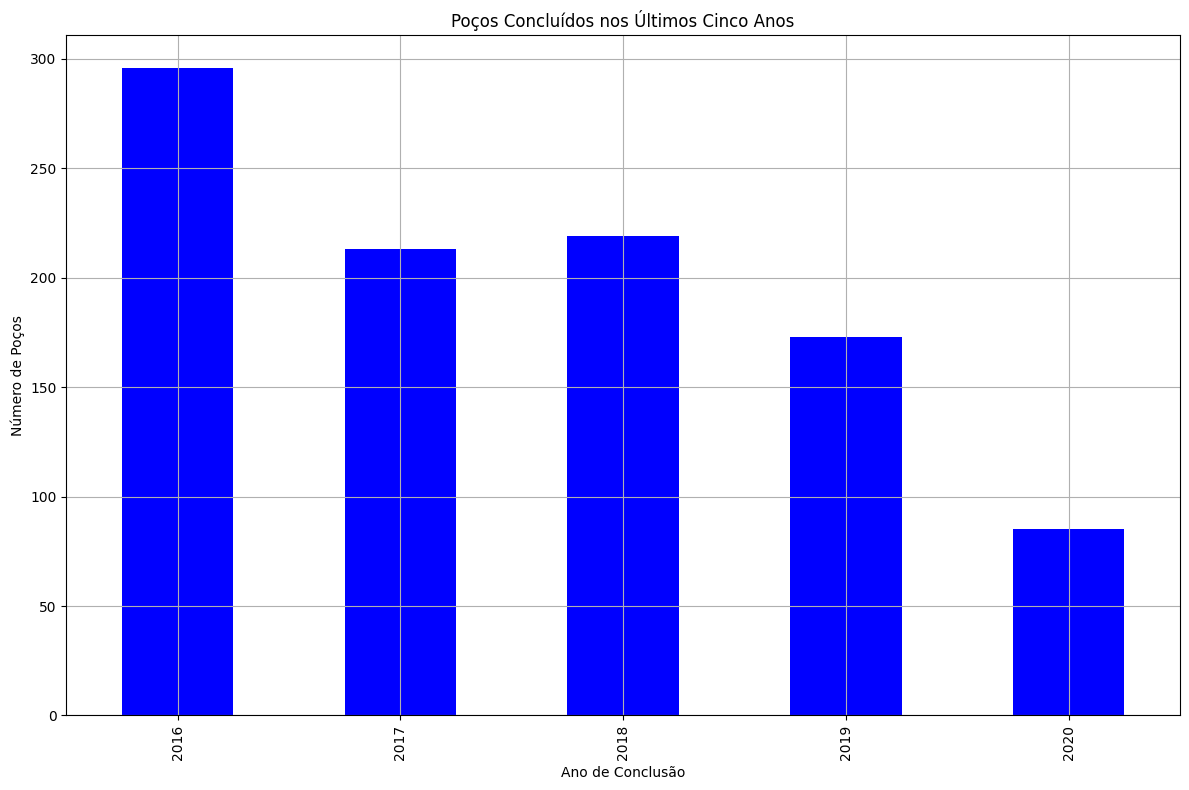

In [26]:
# Calcular o ano mais recente presente nos dados
ultimo_ano = df['CONCLUSAO'].dt.year.max()

# Filtrar os dados para incluir apenas os poços concluídos nos últimos cinco anos
df_ultimos_cinco_anos = df[df['CONCLUSAO'].dt.year >= ultimo_ano - 4]

# Contar o número de poços concluídos em cada ano nos últimos cinco anos
poços_por_ano = df_ultimos_cinco_anos.groupby(df_ultimos_cinco_anos['CONCLUSAO'].dt.year)['POCO'].count()

# Criar figura e eixos
plt.figure(figsize=(12, 8))

# Criar gráfico de colunas para poços concluídos nos últimos cinco anos
poços_por_ano.plot(kind='bar', color='b')

# Definir rótulos e título
plt.xlabel('Ano de Conclusão')
plt.ylabel('Número de Poços')
plt.title('Poços Concluídos nos Últimos Cinco Anos')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

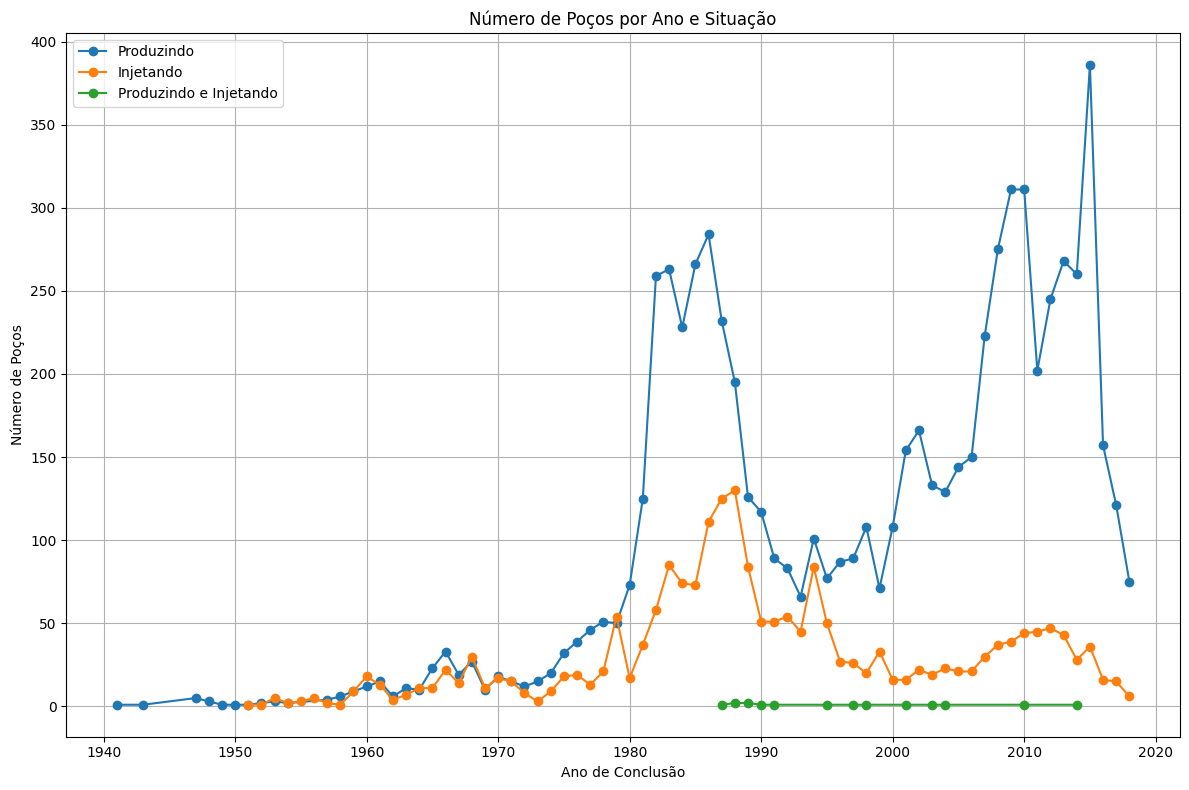

In [27]:
# Filtrar os dados para cada situação desejada
df_produzindo = df[df['SITUACAO'] == 'PRODUZINDO']
df_injetando = df[df['SITUACAO'] == 'INJETANDO']
df_produzindo_injetando = df[df['SITUACAO'] == 'PRODUZINDO E INJETANDO']

# Agrupar os dados por ano de conclusão e contar o número de poços para cada situação
poços_produzindo_por_ano = df_produzindo.groupby(df_produzindo['CONCLUSAO'].dt.year)['POCO'].count()
poços_injetando_por_ano = df_injetando.groupby(df_injetando['CONCLUSAO'].dt.year)['POCO'].count()
poços_produzindo_injetando_por_ano = df_produzindo_injetando.groupby(df_produzindo_injetando['CONCLUSAO'].dt.year)['POCO'].count()

# Criar figura e eixos
plt.figure(figsize=(12, 8))

# Plotar as linhas para cada situação
plt.plot(poços_produzindo_por_ano.index, poços_produzindo_por_ano, marker='o', label='Produzindo')
plt.plot(poços_injetando_por_ano.index, poços_injetando_por_ano, marker='o', label='Injetando')
plt.plot(poços_produzindo_injetando_por_ano.index, poços_produzindo_injetando_por_ano, marker='o', label='Produzindo e Injetando')

# Definir rótulos e título
plt.xlabel('Ano de Conclusão')
plt.ylabel('Número de Poços')
plt.title('Número de Poços por Ano e Situação')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
